Dataset Description

Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
Age(age) -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [1]:
# see the value of multiple statements at once
# output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to suppress the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
import time
import itertools as it


# This magic command line tells the notebook to show plots inline
%matplotlib inline

# Set a style/theme to the plots
sns.set_style(style='darkgrid')
plt.style.use('ggplot')

In [3]:
concrete_df = pd.read_csv('Concrete_Data.csv')

In [4]:
len(concrete_df)

1030

In [5]:
concrete_df.shape

(1030, 9)

In [6]:
concrete_df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Observations:
    
It shows that there are eight independent variables ( Cement, BlastFurnace , FlyAsh, Water, Superplasticizer, CoarseAggregate, FineAggregate, Age) and one dependent variable (ConcreteCompressiveStrength).
All the records are numeric in the dataset.

In [7]:
# checking for the null values

In [8]:
for i in concrete_df.columns:
    print('column name:',i)
    print(concrete_df[i].value_counts())
    print('**********************************')

column name: Cement 
362.6    20
425.0    20
251.4    15
310.0    14
446.0    14
         ..
313.8     1
147.8     1
260.9     1
136.4     1
321.3     1
Name: Cement , Length: 278, dtype: int64
**********************************
column name: Blast_Furnace_Slag 
0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
178.1      1
148.9      1
98.8       1
128.9      1
169.4      1
Name: Blast_Furnace_Slag , Length: 185, dtype: int64
**********************************
column name: Fly_Ash
0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
71.0       1
138.0      1
166.0      1
182.0      1
143.2      1
Name: Fly_Ash, Length: 156, dtype: int64
**********************************
column name: Water
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
127.0      1
166.7      1
191.3      1
172.4      1
177.6      1
Name: Water, Length: 195, dtype: int64
**********************************
column name: Superplasticizer
0

In [9]:
concrete_df.info

<bound method DataFrame.info of       Cement   Blast_Furnace_Slag   Fly_Ash  Water  Superplasticizer  \
0       540.0                  0.0      0.0  162.0               2.5   
1       540.0                  0.0      0.0  162.0               2.5   
2       332.5                142.5      0.0  228.0               0.0   
3       332.5                142.5      0.0  228.0               0.0   
4       198.6                132.4      0.0  192.0               0.0   
...       ...                  ...      ...    ...               ...   
1025    276.4                116.0     90.3  179.6               8.9   
1026    322.2                  0.0    115.6  196.0              10.4   
1027    148.5                139.4    108.6  192.7               6.1   
1028    159.1                186.7      0.0  175.6              11.3   
1029    260.9                100.5     78.3  200.6               8.6   

      Coarse_Aggregate  Fine_Aggregate  Age  Concrete_compressive_strength  
0               1040.0    

In [10]:
concrete_df.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age                                int64
Concrete_compressive_strength    float64
dtype: object

In [11]:
concrete_df.isnull().sum()


Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

In [12]:
concrete_df.isnull().head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


# Observations:
 - It shows the no null values present in the dataset.
 - 'True' represents the null values and 'False' represents there are no null values in the dataset.

In [13]:
#Summary statistics

concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast_Furnace_Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly_Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse_Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine_Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Observations:
    
-All of the data in the dataset is numerical.

-No null/NAN data.

-Age data appears to have outliers because max value is very large as compared to 3rd IQR value

# Checking the outliers

a) Based on IQR
         i. Values less than Q1 - 1.5*IQR
         ii. Values greater than Q3 + 1.5*IQR
         
 - IQR divides the values into three quartiles Q1,Q2 & Q3.Q2 represents the median of the range.
 - Here we find the lower limit and upper limit of the range.
                   
b) Using Boxplots    

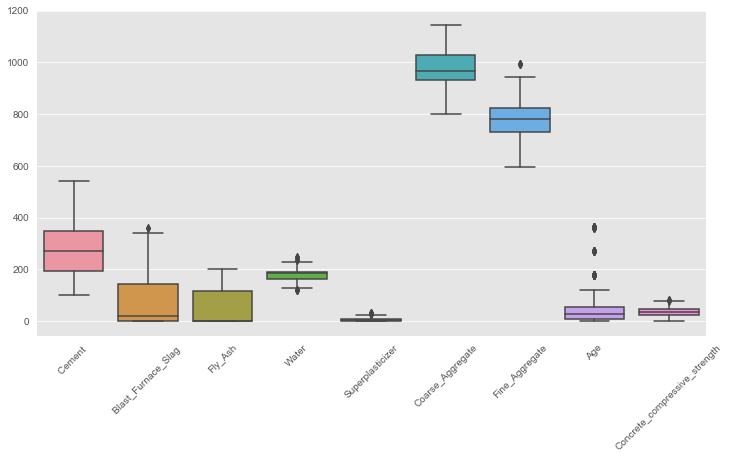

In [14]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=concrete_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#Observations:

Age column appears to be having maximum number of outliers
Slag, Water, superplastic, fineaggregate features have some outliers
All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale
the data so as to avoid bias in algorithms

# Boxplot for each columns

In [15]:
concrete_df.rename({'Cement ':'Cement',},axis=1,inplace=True)

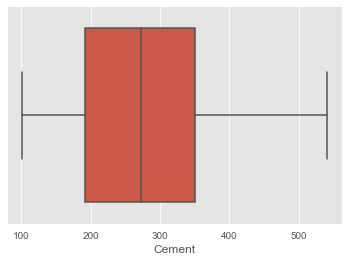

In [16]:
sns.boxplot(concrete_df.Cement)
plt.show()

In [17]:
Q1 = concrete_df.Cement.quantile(0.25)
Q3 = concrete_df.Cement.quantile(0.75)
Q1, Q3

(192.375, 350.0)

In [18]:
IQR = Q3 - Q1
IQR

157.625

In [19]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-44.0625, 586.4375)

In [20]:
concrete_df[(concrete_df.Cement<lower_limit)|(concrete_df.Cement>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength


# Observations: Cement
 - The values obtained less than lower limit and more than upper limit is '0'.
 - There were no outliers.

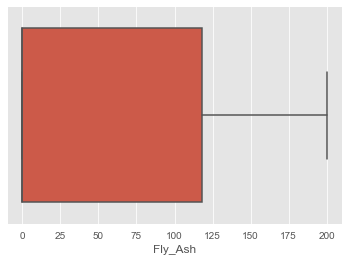

In [21]:
#box plot for the column Fly_Ash of the dataset
sns.boxplot(x=concrete_df.Fly_Ash);

In [22]:
Q1 = concrete_df.Fly_Ash.quantile(0.25)
Q3 = concrete_df.Fly_Ash.quantile(0.75)
Q1, Q3

(0.0, 118.3)

In [23]:
IQR = Q3 - Q1
IQR

118.3

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-177.45, 295.75)

In [25]:
concrete_df[(concrete_df.Fly_Ash<lower_limit)|(concrete_df.Fly_Ash>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength


# Observations: FlyAsh
 - The values obtained less than lower limit and more than upper limit is '0'.
 - There were no outliers.

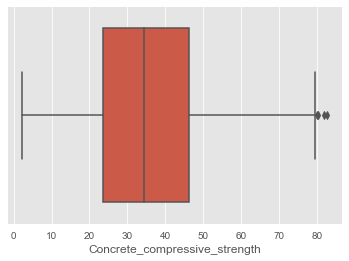

In [26]:
#box plot for the column concrete_compressive_strength of the dataset

sns.boxplot(x=concrete_df.Concrete_compressive_strength)

In [27]:
Q1 = concrete_df.Concrete_compressive_strength.quantile(0.25)
Q3 = concrete_df.Concrete_compressive_strength.quantile(0.75)
Q1, Q3

(23.71, 46.135000000000005)

In [28]:
IQR = Q3 - Q1
IQR

22.425000000000004

In [29]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-9.927500000000002, 79.77250000000001)

In [30]:
concrete_df[(concrete_df.Concrete_compressive_strength<lower_limit)|(concrete_df.Concrete_compressive_strength>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75


# Observations: ConcreteCompressiveStrength
 - Four values were obtained from less than lower limit and more than upper limit.
 - There were '4' outliers.

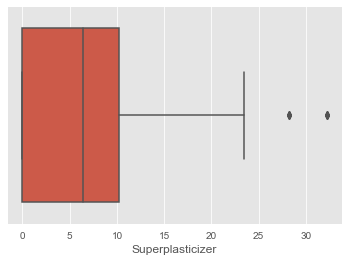

In [31]:
#box plot for the column superplasticizer of the dataset
sns.boxplot(x=concrete_df['Superplasticizer'])

In [32]:
Q1 = concrete_df.Superplasticizer.quantile(0.25)
Q3 = concrete_df.Superplasticizer.quantile(0.75)
Q1, Q3

(0.0, 10.2)

In [33]:
IQR = Q3 - Q1
IQR

10.2

In [34]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-15.299999999999999, 25.5)

In [35]:
concrete_df[(concrete_df.Superplasticizer<lower_limit)|(concrete_df.Superplasticizer>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


# Observations: Superplasticizer
 - Ten values were obtained from less than lower limit and more than upper limit.
 - There were '10' outliers.

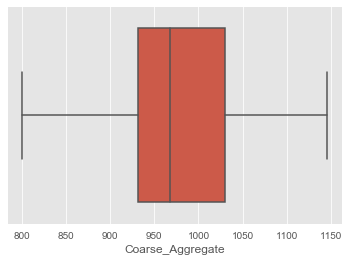

In [36]:
#Boxplot for column Coarse_Aggregate

sns.boxplot(x=concrete_df['Coarse_Aggregate']);

In [37]:
Q1 = concrete_df.Coarse_Aggregate.quantile(0.25)
Q3 = concrete_df.Coarse_Aggregate.quantile(0.75)
Q1, Q3

(932.0, 1029.4)

In [38]:
IQR = Q3 - Q1
IQR

97.40000000000009

In [39]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(785.8999999999999, 1175.5000000000002)

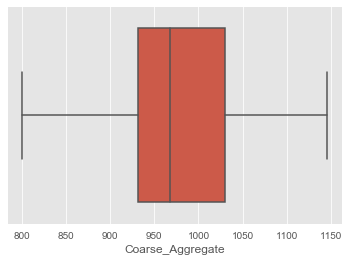

In [40]:
sns.boxplot(x=concrete_df['Coarse_Aggregate']);

In [41]:
Q1 = concrete_df.Coarse_Aggregate.quantile(0.25)
Q3 = concrete_df.Coarse_Aggregate.quantile(0.75)
Q1, Q3

(932.0, 1029.4)

In [42]:
IQR = Q3 - Q1
IQR

97.40000000000009

In [43]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(785.8999999999999, 1175.5000000000002)

In [44]:
concrete_df[(concrete_df.Coarse_Aggregate<lower_limit)|(concrete_df.Coarse_Aggregate>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength


# Observations: CoarseAggregate
 - The values obtained less than lower limit and more than upper limit is '0'.
 - There were no outliers.

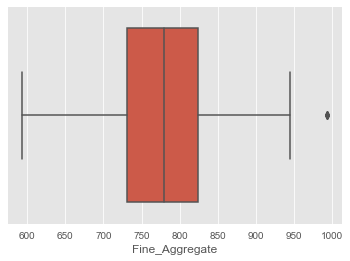

In [45]:
# Boxplot for the column Fineaggregate
sns.boxplot(x=concrete_df['Fine_Aggregate']);

In [46]:
Q1 = concrete_df.Fine_Aggregate.quantile(0.25)
Q3 = concrete_df.Fine_Aggregate.quantile(0.75)
Q1, Q3

(730.95, 824.0)

In [47]:
IQR = Q3 - Q1
IQR

93.04999999999995

In [48]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(591.3750000000001, 963.5749999999999)

In [49]:
concrete_df[(concrete_df.Fine_Aggregate<lower_limit)|(concrete_df.Fine_Aggregate>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5


# Observations: FineAggregate
 - Five values were obtained from less than lower limit and more than upper limit.
 - There were '5' outliers.

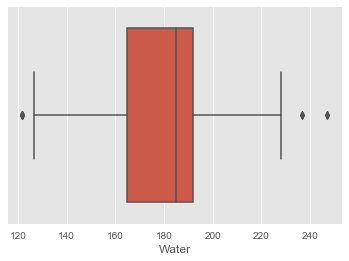

In [50]:
#Boxplot for column Water

sns.boxplot(x=concrete_df['Water']);

In [51]:
Q1 = concrete_df.Water.quantile(0.25)
Q3 = concrete_df.Water.quantile(0.75)
Q1, Q3

(164.9, 192.0)

In [52]:
IQR = Q3 - Q1
IQR

27.099999999999994

In [53]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(124.25000000000001, 232.64999999999998)

In [54]:
concrete_df[(concrete_df.Water<lower_limit)|(concrete_df.Water>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


# Observations: Water
 - Nine values were obtained from less than lower limit and more than upper limit.
 - There were '9' outliers.

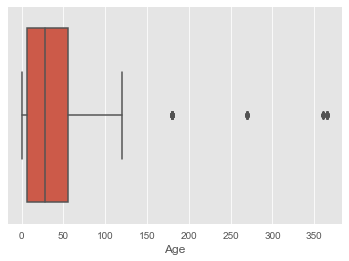

In [55]:
#Boxplot for the column Age

sns.boxplot(x=concrete_df['Age']);

In [56]:
Q1 = concrete_df.Age.quantile(0.25)
Q3 = concrete_df.Age.quantile(0.75)
Q1, Q3

(7.0, 56.0)

In [57]:
IQR = Q3 - Q1
IQR


49.0

In [58]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-66.5, 129.5)

In [59]:
concrete_df[(concrete_df.Age<lower_limit)|(concrete_df.Age>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


# Observations: Age
 - Age has so many values obtained from less than lower limit and more than upper limit.
 - There were many outliers.

# Remove outliers

In [60]:
cols = ['Cement', 'Blast_Furnace_Slag ', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Concrete_compressive_strength'] 

Q1 = concrete_df[cols].quantile(0.25)
Q3 = concrete_df[cols].quantile(0.75)
IQR = Q3 - Q1

concrete_df = concrete_df[~((concrete_df[cols] < (Q1 - 1.5 * IQR)) |(concrete_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
concrete_df.shape

(941, 9)

# Observations:
After removing outliers the shape of the dataset differs.
It reduces the shape of the dataset.

# Exploratory data analysis

a) Univariate Analysis

b) Bi-Variate Analysis

Text(0, 0.5, 'Frequency')

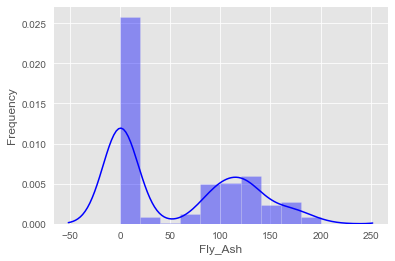

In [62]:
#Distrubution plot of column Fly_Ash

sns.distplot(concrete_df['Fly_Ash'], bins=10, color='b')

plt.ylabel("Frequency")

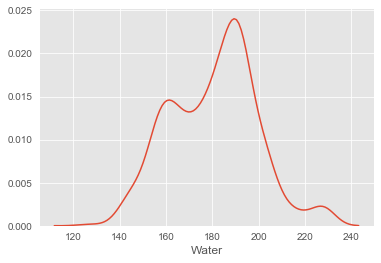

In [63]:
# Distribution plot without Histogram

sns.distplot(concrete_df.Water,hist=False)
plt.show()

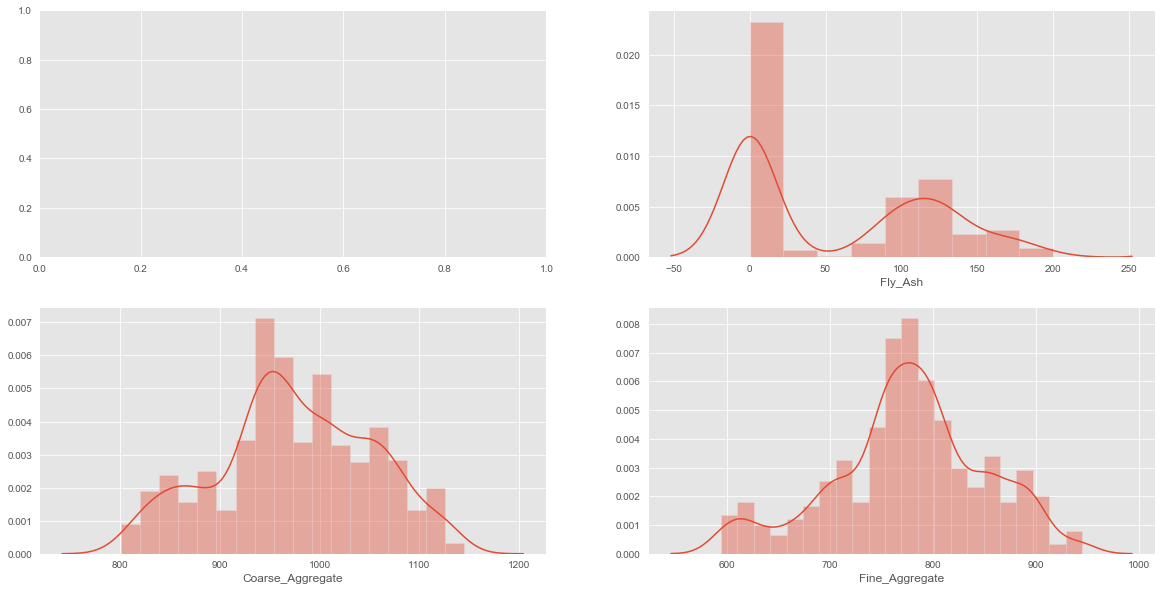

In [64]:
# distribution plots as subplots (Univariate)
fig,axes = plt.subplots(2,2, figsize=(20,10))
sns.distplot(concrete_df['Fly_Ash'].dropna(),kde=True,ax=axes[0,1])
sns.distplot(concrete_df['Coarse_Aggregate'].dropna(),kde=True,ax=axes[1,0])
sns.distplot(concrete_df['Fine_Aggregate'].dropna(),kde=True,ax=axes[1,1])

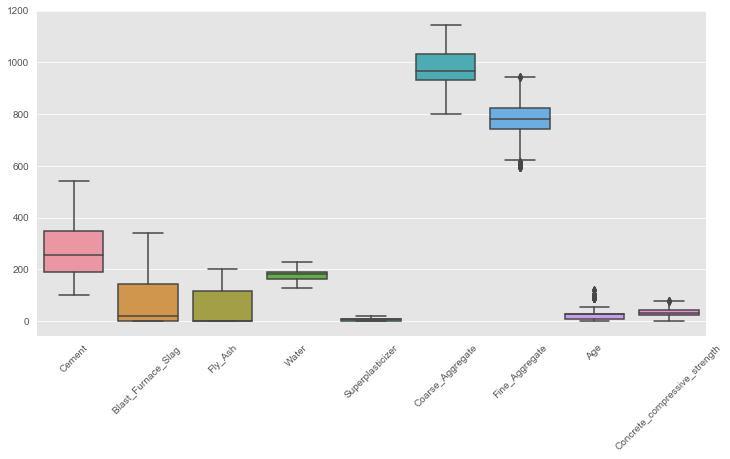

In [65]:
#Box plot

plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=concrete_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Observations:

Age column appears to be having maximum number of outliers
Slag, Water, superplastic, fineaggregate features have some outliers+

Text(0.5, 1.0, 'Cement')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Blast_Furnace_Slag ')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Fly_Ash')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Water')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Superplasticizer')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Coarse_Aggregate')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Fine_Aggregate')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Age')

Text(0.5, 0, '')

ValueError: num must be 1 <= num <= 8, not 9

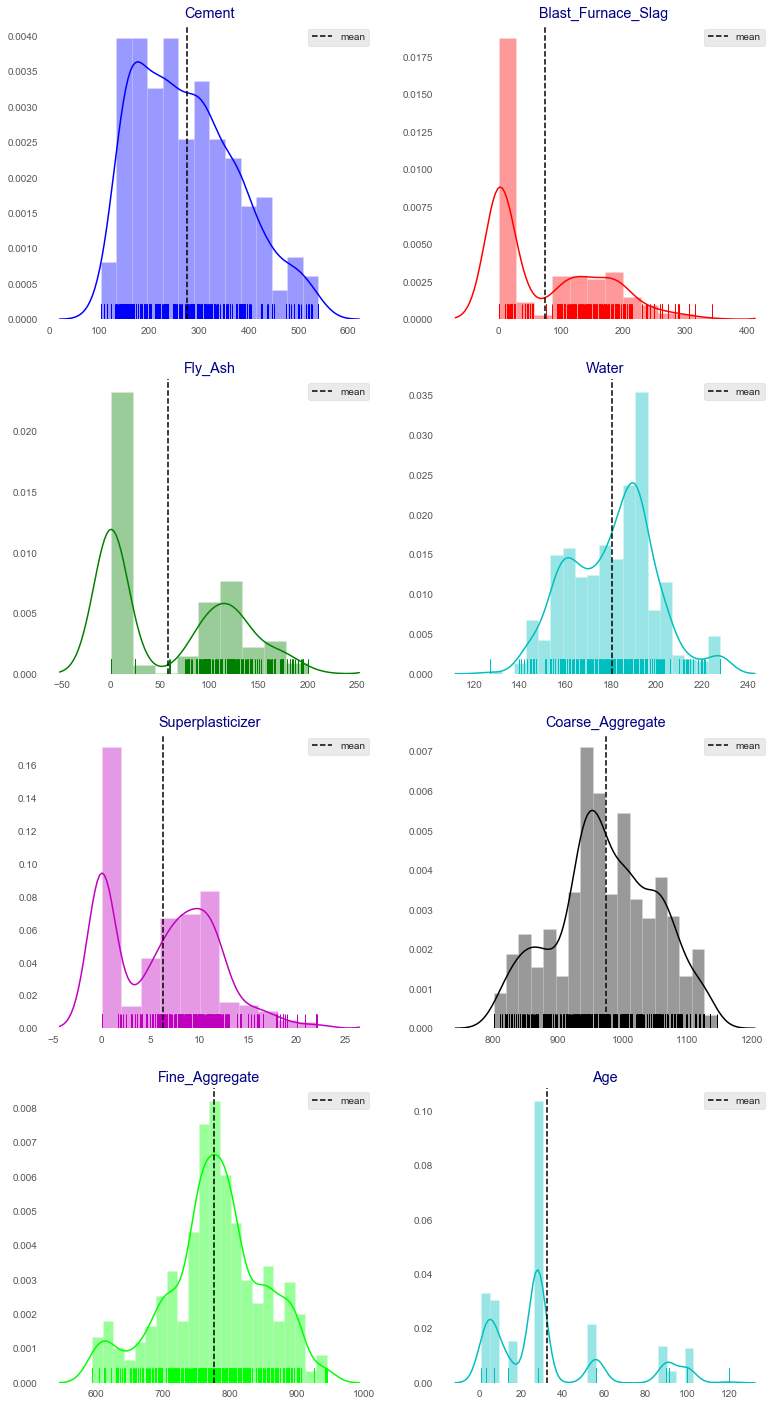

In [66]:
# Distribution of components of concrete

cols = [i for i in concrete_df.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in it.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concrete_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(concrete_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("");

# Observations:

 - Cement is almost normal.
 - BlastFurnace has three gausssians and rightly skewed.
 - FlyAsh has two gaussians and rightly skewed.
 - Water has three guassians and slighly left skewed.
 - Superplasticizer has two gaussians and rightly skewed.
 - CoarseAggregate has three guassians and almost normal.
 - FineAggregate has almost two guassians and looks like normal.
 - Age has multiple guassians and rightly skewed.
 - ConcreteCompressiveStrength looks like normal.

In [ ]:
#Correlation Matrix

sns.heatmap(concrete_df.corr(), annot=True, linewidth=2)
plt.title("Correlation between variables")
plt.show();

In [ ]:
concrete_df.corr()

# Observations:
 - The correlation values between the attributes .

In [ ]:
# Scatterplot between components

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(concrete_df["Water"],concrete_df["Cement"],
            c=concrete_df["Concrete_compressive_strength"],s=concrete_df["Concrete_compressive_strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("Water")
ax.set_ylabel("Cement")
lab = plt.colorbar()
lab.set_label("Concrete_compressive_strength")
plt.title("cement vs water")
plt.show()

In [ ]:
# pairplot of dataframe
sns.pairplot(concrete_df, diag_kind='kde' )
plt.show()

# Diagonals Analysis
### The diagonal gives the same information, we got using distplot.

 - Cement attribute have almost normal curve.
 - BlastFurnace has two gausssians and rightly skewed.It shows the presence of outlies.
 - FlyAsh has two gaussians and rightly skewed.It shows the presence of outlies.
 - Water has atleast guassians and slighly left skewed.It shows the presence of outlies.
 - Superplasticizer has multiple gaussians and rightly skewed.It shows the presence of outlies.
 - CoarseAggregate has three guassians and almost normal.
 - FineAggregate has almost two guassians and looks like normal.
 - Age has multiple guassians and rightly skewed. It shows the presence of outlies.
 - ConcreteCompressiveStrength is close to a normal curve.

# What is the type of machine learning problem at hand? (Supervised or Unsupervised?) why?


Supervised Machine learning (Regression technique) In supervised learning, models are trained using labelled dataset, where the model learns about each type of data. Once the training process is completed, the model is tested on the basis of test data (a subset of the training set), and then it predicts the output.

# Splitting the data into Train and Test

In [ ]:
# The dataset is divided into a 70 to 30 splitting between training data and test data

from sklearn.model_selection import train_test_split
train,test = train_test_split(concrete_df,test_size =.3,random_state = 0)
train_X = train[[x for x in train.columns if x not in ["Concrete_compressive_strength"] + ["age_months"]]]
train_Y = train["Concrete_compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["Concrete_compressive_strength"] + ["age_months"]]]
test_Y  = test["Concrete_compressive_strength"]


In [ ]:
# Check for the sampled data

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)|

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(train_X)
train_X_scl = Fit.transform(train_X)
test_X_scl = Fit.transform(test_X)

we import train_test_split from scikit-learn then create StandardScaler() class object, after creating the object we fit train data into StandardScaler for scaling the data and then we transform the train and test data into an array.

# There are 3 main metrics for model evaluation in regression:
1. R Square/Adjusted R Square
2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
3. Mean Absolute Error(MAE)

# Multiple linear regression

In [ ]:
#fit a model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
lm = LinearRegression()
model1 = lm.fit(train_X, train_Y)
predictions1 = lm.predict(test_X)
m1=model1.score(test_X, test_Y)
RMSE1=np.sqrt(metrics.mean_squared_error(test_Y, predictions1))
print('Accuracy of model is', model1.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions1))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions1)))

In [ ]:
# Features Importance

coef=pd.DataFrame(lm.coef_.ravel())
coef['feat']=train_X.columns
c=coef['feat'].rows=['C','Bfs','Fa','W','Sp','Ca','Fa','a']
num_colors = 8;
colors = cm.rainbow(np.linspace(0,1,num_colors))
plt.bar(c,coef[0], color=colors)
plt.show()
'where C:Cement, Bfs: Blast_Furnace_Slag, Fa: Fly_Ash, W:Water, Sp:Superplasticizer, Ca:Coarse_Aggregate, Fa: Fine_Aggregate, a: Age'

In [ ]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions1})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# LASSO Regression

In [ ]:
# Model 2: LASSO Model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
las = Lasso(alpha=0.1)
model2 = las.fit(train_X, train_Y)
predictions2 = las.predict(test_X)
m2=model2.score(test_X, test_Y)
RMSE2=np.sqrt(metrics.mean_squared_error(test_Y, predictions2))
print('Accuracy of model is', model2.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions2)))

In [ ]:
# Feature selection
coef1=pd.DataFrame(las.coef_.ravel())
coef1['feat']=train_X.columns
c1=coef['feat'].rows=['C','Bfs','Fa','W','Sp','Ca','Fa','a']
num_colors = 8;
colors = cm.rainbow(np.linspace(0,1,num_colors))
plt.bar(c1, coef[0], color=colors)
plt.show()

In [ ]:
# Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions2})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# RIDGE Regression

In [ ]:
# Model 3: RIDGE Model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import metrics
Rid = Ridge(alpha=0.1)
model3 = Rid.fit(train_X, train_Y)
predictions3 = Rid.predict(test_X)
m3=model3.score(test_X, test_Y)
RMSE3=np.sqrt(metrics.mean_squared_error(test_Y, predictions3))
print('Accuracy of model is', model3.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions3))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions3)))

In [ ]:
# Feature selection
coef1=pd.DataFrame(Rid.coef_.ravel())
coef1['feat']=train_X.columns
c1=coef['feat'].rows=['C','Bfs','Fa','W','Sp','Ca','Fa','a']
num_colors = 8;
colors = cm.rainbow(np.linspace(0,1,num_colors))
plt.bar(c1, coef[0], color=colors)
plt.show()

In [ ]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions3})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random forest regression

In [ ]:
# Model 4: Random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
Rnd = RandomForestRegressor(ccp_alpha=0.0)
model4 = Rnd.fit(train_X, train_Y)
predictions4 = Rnd.predict(test_X)
m4=model4.score(test_X, test_Y)
RMSE4=np.sqrt(metrics.mean_squared_error(test_Y, predictions4))
print('Accuracy of model is', model4.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions4))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions4)))

In [ ]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions4})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
x_predict = list(Rnd.predict(test_X))
predicted_df = {'predicted_values': x_predict, 'original_values': test_Y}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

# Decision tree regression

In [ ]:
# Model 5: Decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
dtr = DecisionTreeRegressor(ccp_alpha=0.0)
model5 = dtr.fit(train_X, train_Y)
predictions5 = dtr.predict(test_X)
m5=model5.score(test_X, test_Y)
RMSE5=np.sqrt(metrics.mean_squared_error(test_Y, predictions5))
print('Accuracy of model is', model5.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions5))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions5)))

In [ ]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions5})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# KNN regression

In [ ]:
# Model 6: KNN regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
knn = KNeighborsRegressor(n_neighbors=2)
model6 = knn.fit(train_X, train_Y)
predictions6 = knn.predict(test_X)
m6=model6.score(test_X, test_Y)
RMSE6=np.sqrt(metrics.mean_squared_error(test_Y, predictions6))
print('Accuracy of model is', model6.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions6))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions6)))

In [ ]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions6})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# SVM regression

In [ ]:
# Model 7: SVM regression
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn import metrics
svm= svm.SVR(kernel='linear')
model7 = svm.fit(train_X, train_Y)
predictions7 = svm.predict(test_X)
m7=model7.score(test_X, test_Y)
RMSE7=np.sqrt(metrics.mean_squared_error(test_Y, predictions7))
print('Accuracy of model is', model7.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions7))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions7))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions7)))

In [ ]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions7})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Model Comparison through Accuracy(%)

In [ ]:
# Model Comparison
height = [m1, m2, m3, m4, m5, m6, m7]
bars = ('Linear', 'Lasso', 'Ridge', 'Random_Forest', 'Decision_Tree', 'KNN', 'SVM')
plt.figure(figsize=(15,5))
plt.bar(bars,height,color=colors)
plt.xticks(rotation=60)
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.show()

# Observations:
From the above bargraph comparision of the list of regressions based on their Accuaracy(%)
 - Random Forest has the highest accuracy.
 - KNN has the lowest accuracy.

# Model Comparison through RMSE(Root mean square error)score

In [ ]:
# Model Comparison
height = [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7]
bars = ('Linear', 'Lasso', 'Ridge', 'Random_Forest', 'Decision_Tree', 'KNN', 'SVM')
plt.figure(figsize=(15,5))
plt.bar(bars,height,color=colors)
plt.xticks(rotation=60)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

# Observations:
From the above plot of the list of regressions based on their RMSE score

 - Random Forest has the lowest RMSError value.
 - KNN has the highest RMSError value.

# Conclusion: Random Forest Regression is the best method that performs well for the concrete dataset.
-Random Forest has highest accuracy and lowest RMSE.

-Random Forest is the best fit model for this dataset.